In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from itertools import combinations

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('./data/CreditCard Clustering Task - Data.csv', index_col="CUST_ID")
df.head()
df.shape

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

(8950, 17)

Ref

**K-mean**

https://www.kaggle.com/karthickaravindan/k-means-clustering-project

https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail

https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
X = df.iloc[:, :17].values
X.shape

(8636, 17)

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'BALANCE_FREQUENCY')

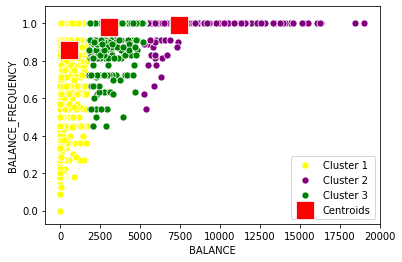

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PURCHASES')

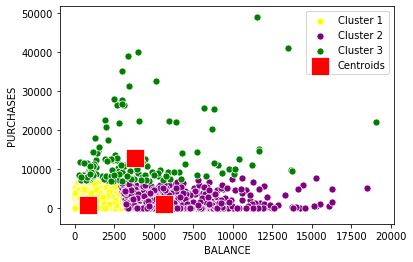

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'ONEOFF_PURCHASES')

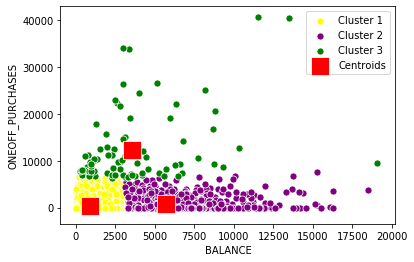

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

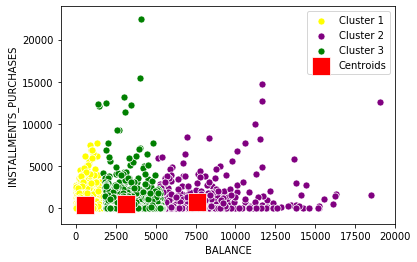

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'CASH_ADVANCE')

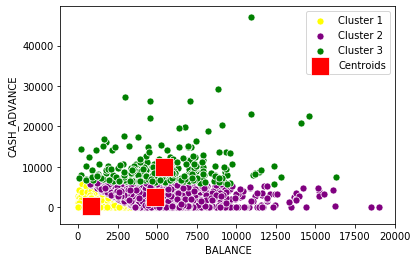

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

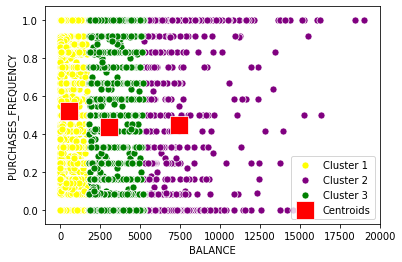

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

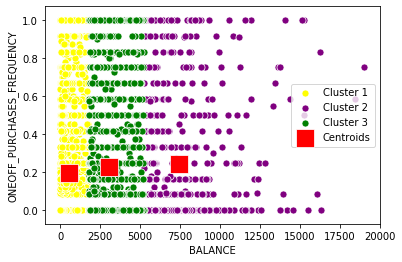

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

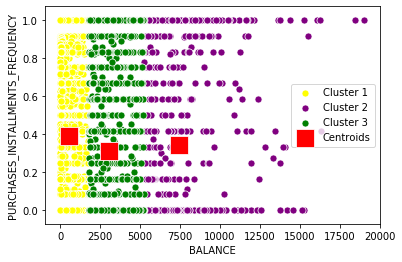

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

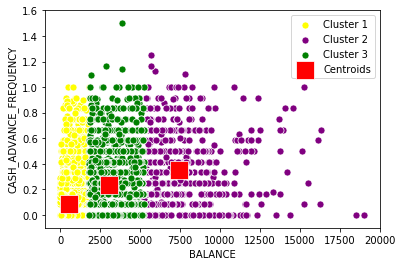

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

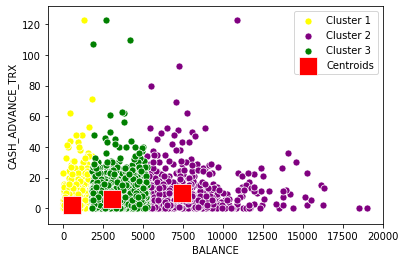

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PURCHASES_TRX')

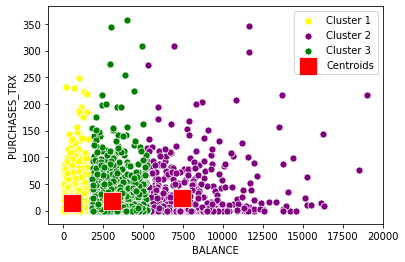

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'CREDIT_LIMIT')

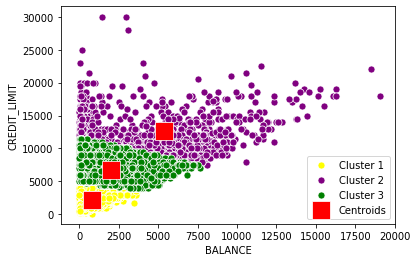

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PAYMENTS')

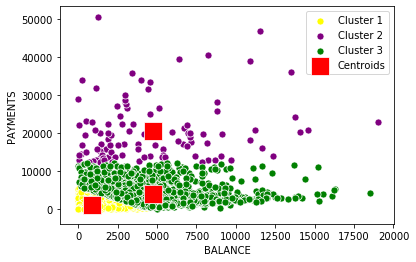

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

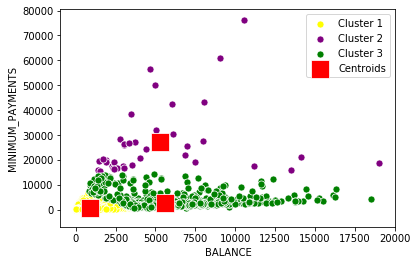

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

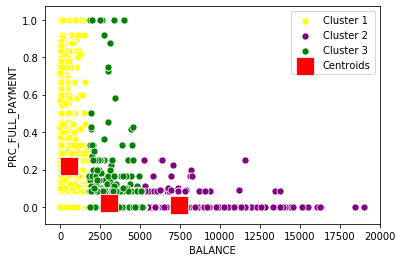

Text(0.5, 0, 'BALANCE')

Text(0, 0.5, 'TENURE')

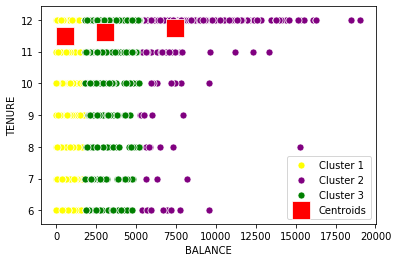

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PURCHASES')

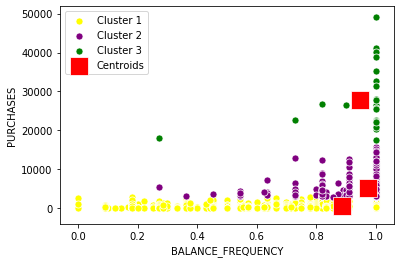

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'ONEOFF_PURCHASES')

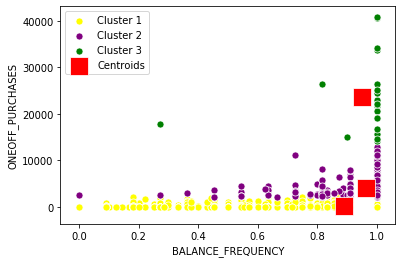

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

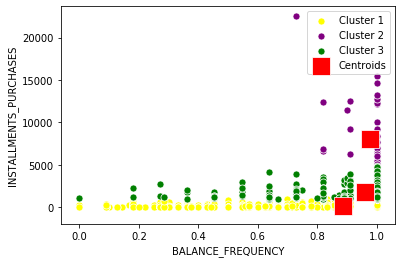

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE')

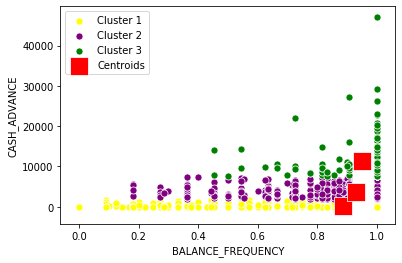

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

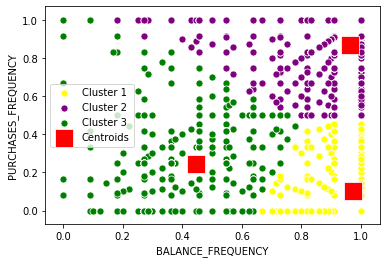

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

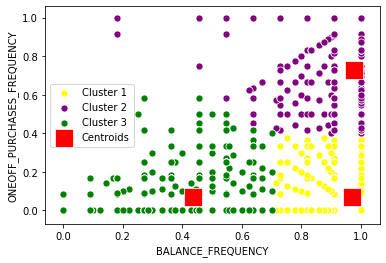

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

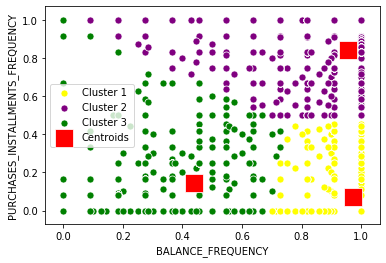

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

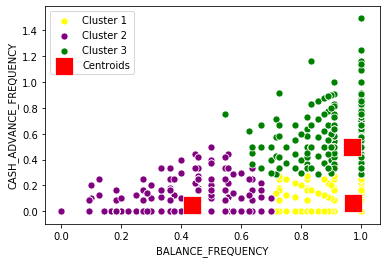

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

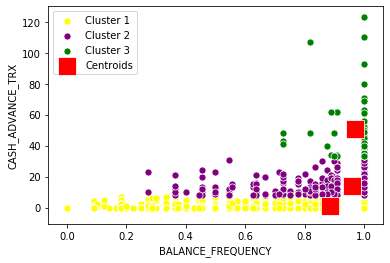

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PURCHASES_TRX')

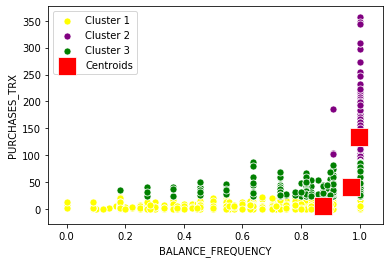

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'CREDIT_LIMIT')

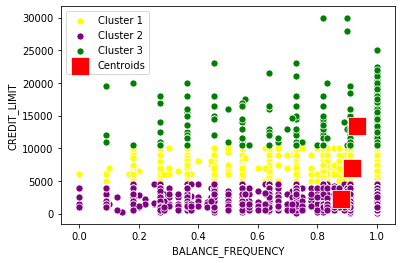

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PAYMENTS')

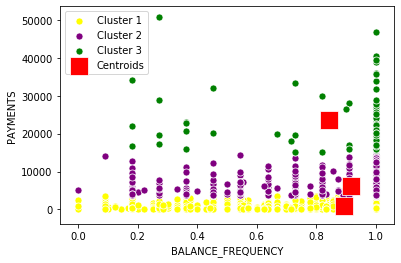

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

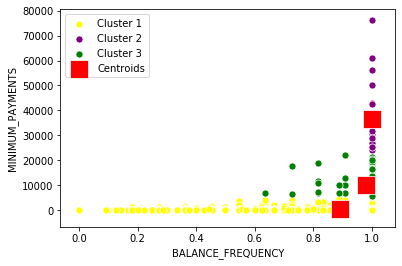

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

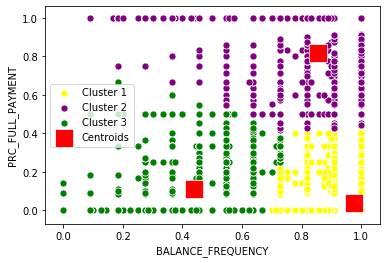

Text(0.5, 0, 'BALANCE_FREQUENCY')

Text(0, 0.5, 'TENURE')

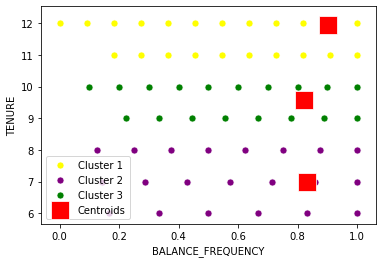

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'ONEOFF_PURCHASES')

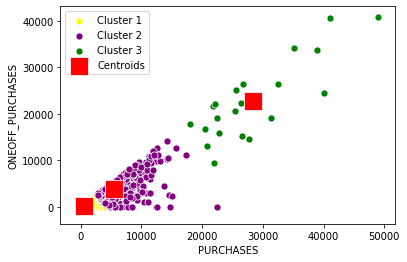

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

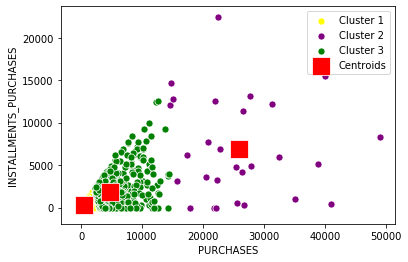

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE')

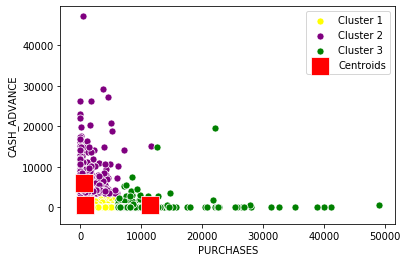

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

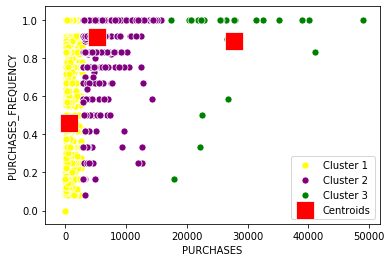

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

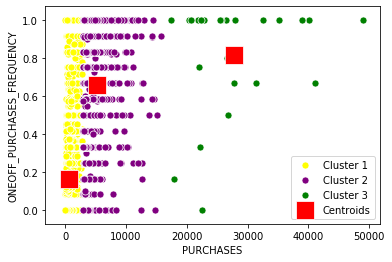

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

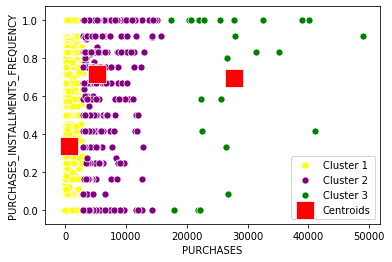

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

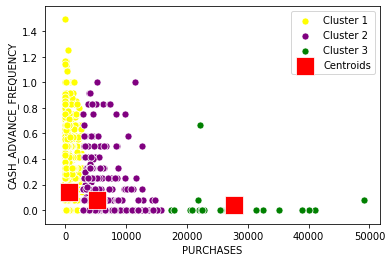

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

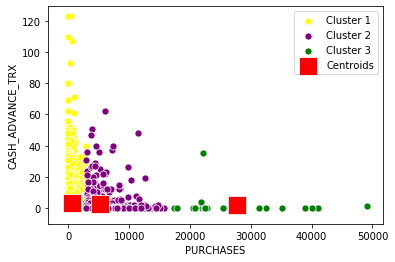

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'PURCHASES_TRX')

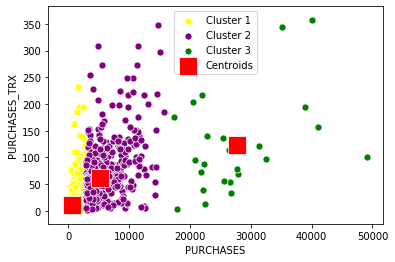

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'CREDIT_LIMIT')

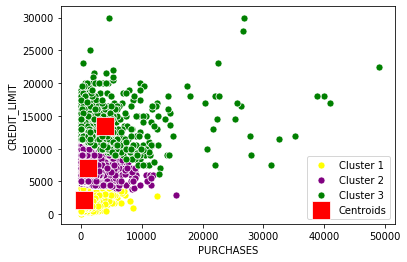

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'PAYMENTS')

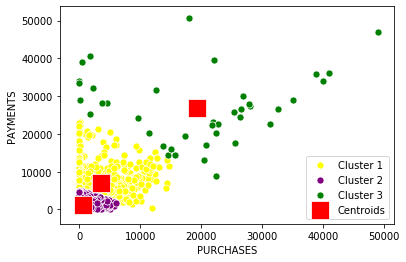

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

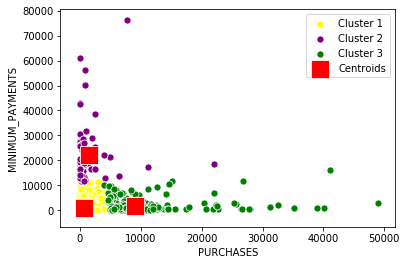

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

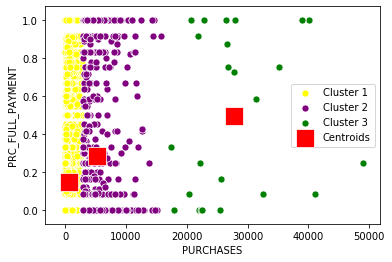

Text(0.5, 0, 'PURCHASES')

Text(0, 0.5, 'TENURE')

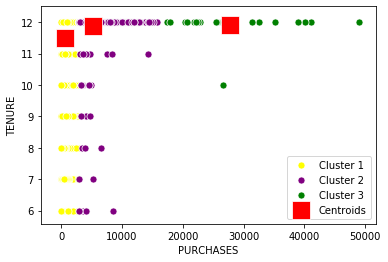

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

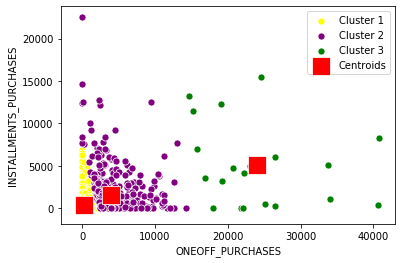

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE')

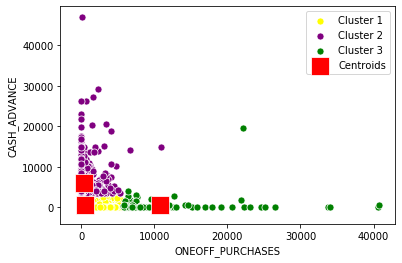

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

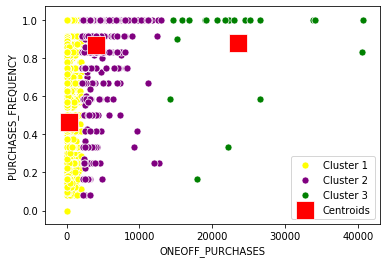

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

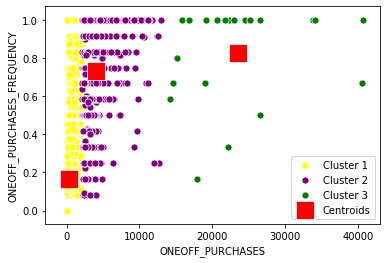

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

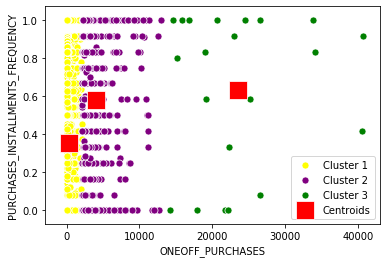

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

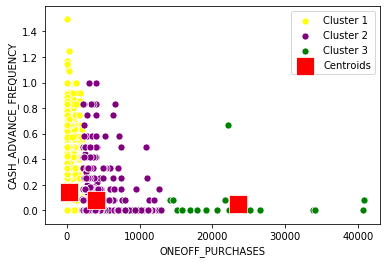

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

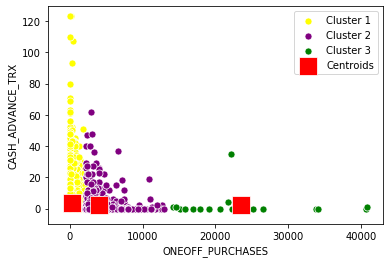

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'PURCHASES_TRX')

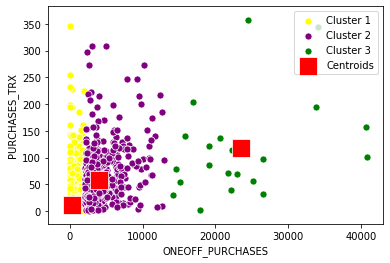

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'CREDIT_LIMIT')

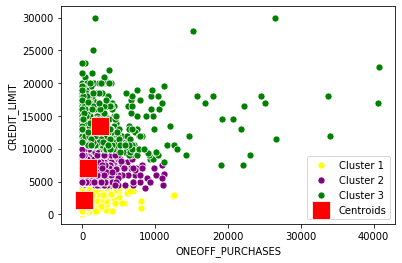

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'PAYMENTS')

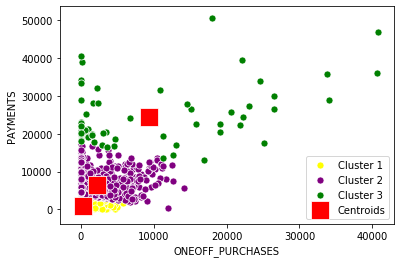

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

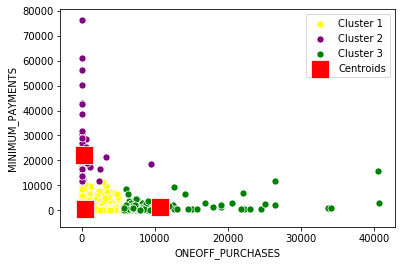

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

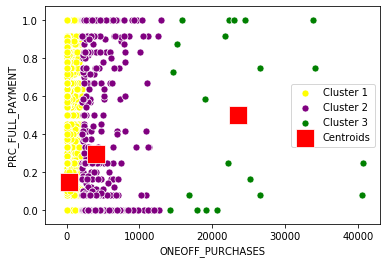

Text(0.5, 0, 'ONEOFF_PURCHASES')

Text(0, 0.5, 'TENURE')

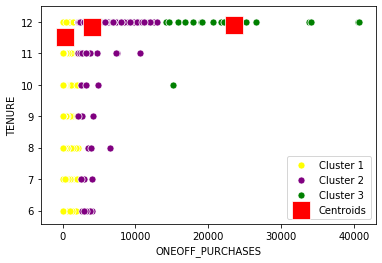

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE')

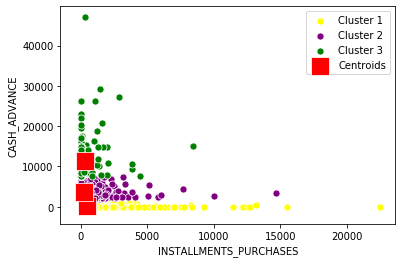

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

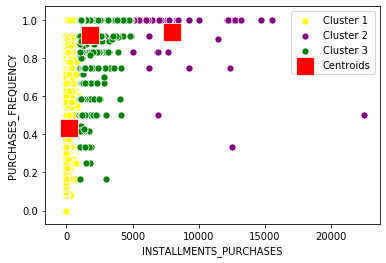

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

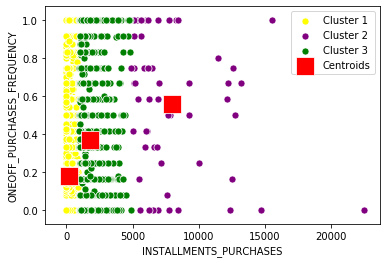

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

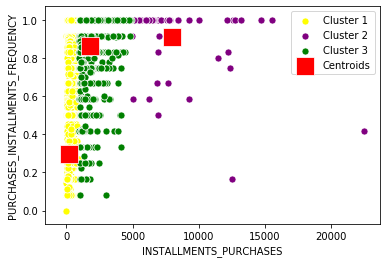

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

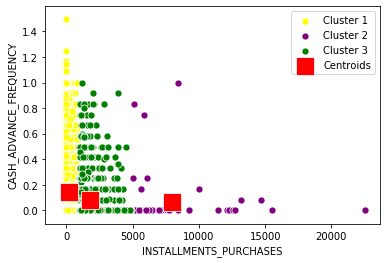

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

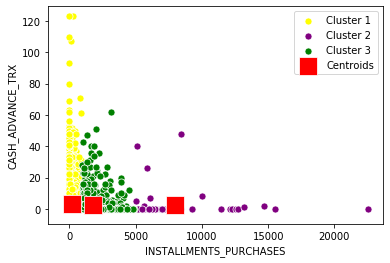

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'PURCHASES_TRX')

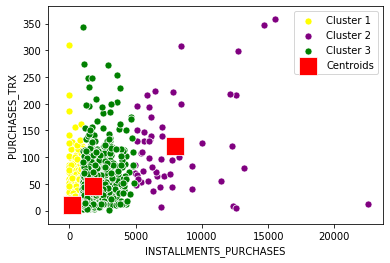

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'CREDIT_LIMIT')

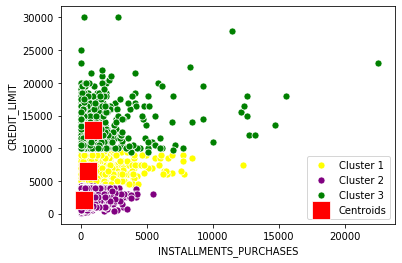

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'PAYMENTS')

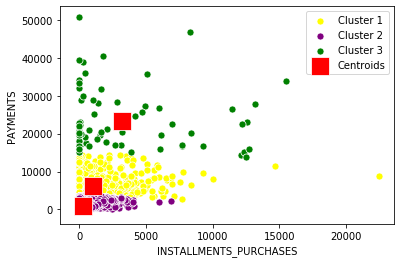

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

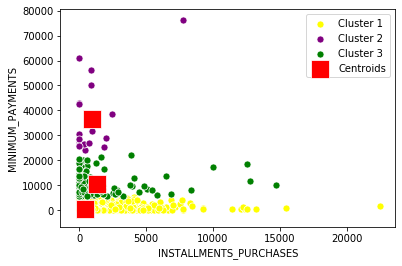

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

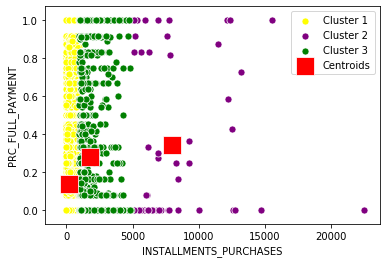

Text(0.5, 0, 'INSTALLMENTS_PURCHASES')

Text(0, 0.5, 'TENURE')

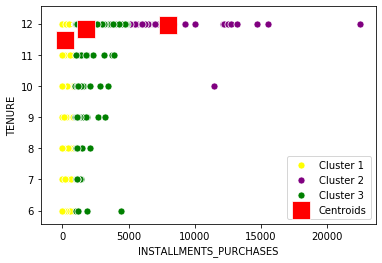

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'PURCHASES_FREQUENCY')

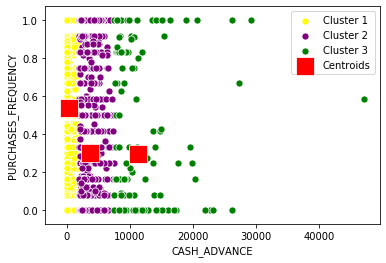

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

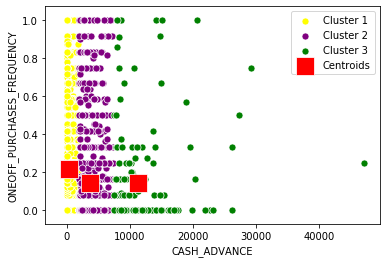

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

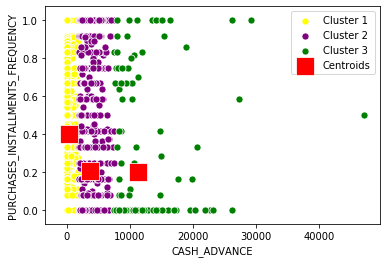

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

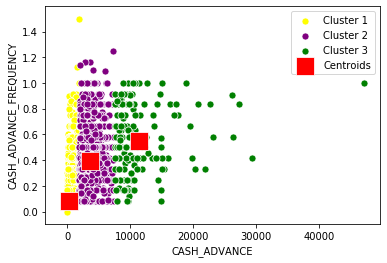

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

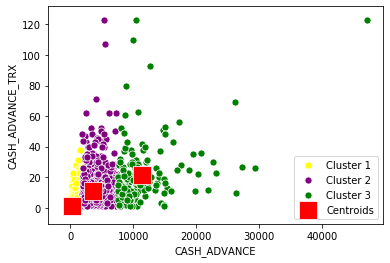

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'PURCHASES_TRX')

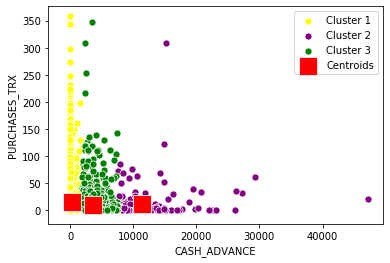

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'CREDIT_LIMIT')

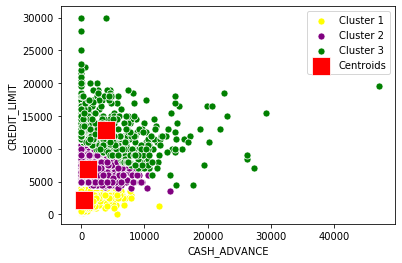

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'PAYMENTS')

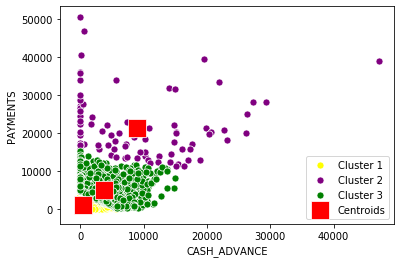

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

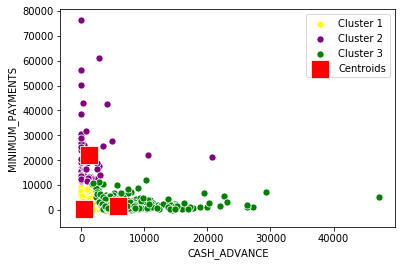

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

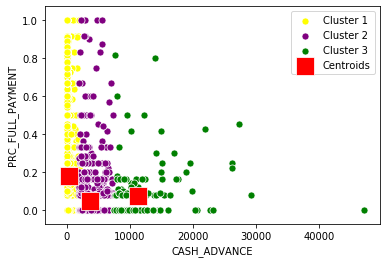

Text(0.5, 0, 'CASH_ADVANCE')

Text(0, 0.5, 'TENURE')

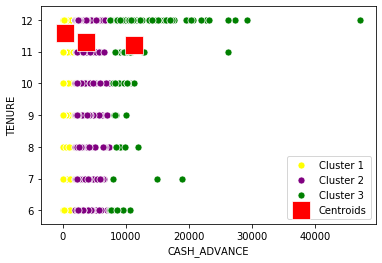

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'ONEOFF_PURCHASES_FREQUENCY')

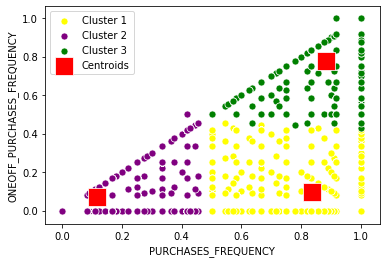

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

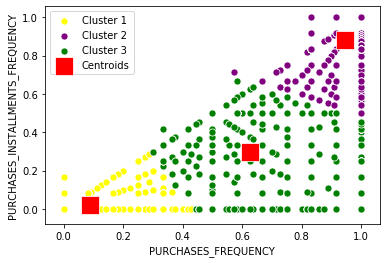

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

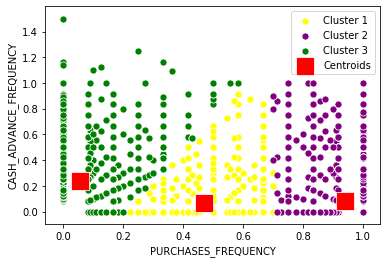

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

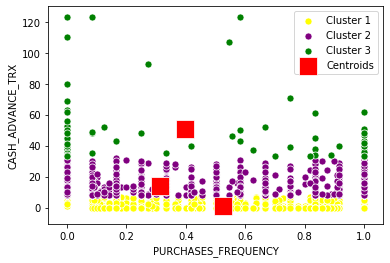

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'PURCHASES_TRX')

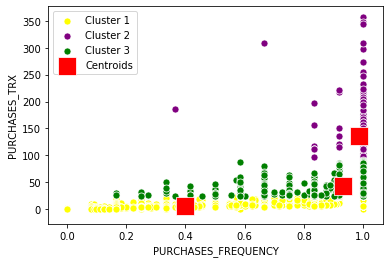

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'CREDIT_LIMIT')

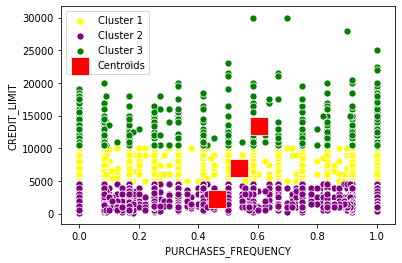

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'PAYMENTS')

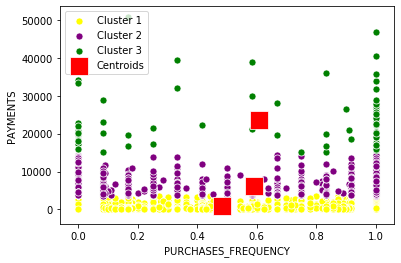

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

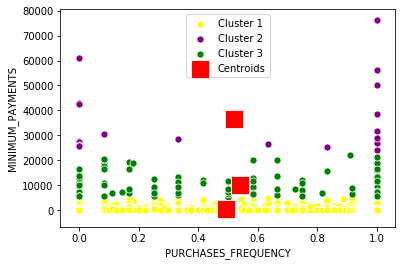

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

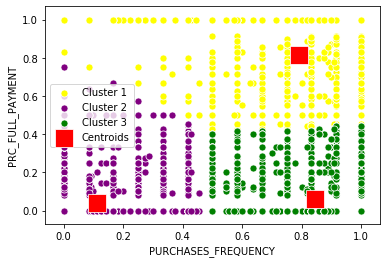

Text(0.5, 0, 'PURCHASES_FREQUENCY')

Text(0, 0.5, 'TENURE')

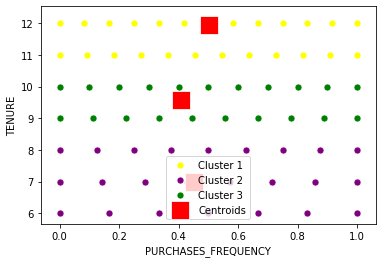

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'PURCHASES_INSTALLMENTS_FREQUENCY')

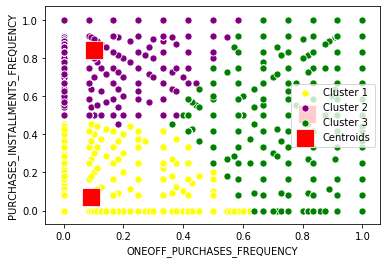

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

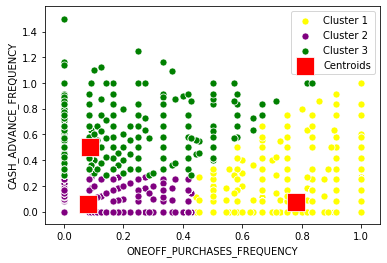

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

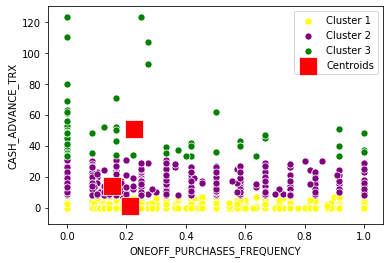

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'PURCHASES_TRX')

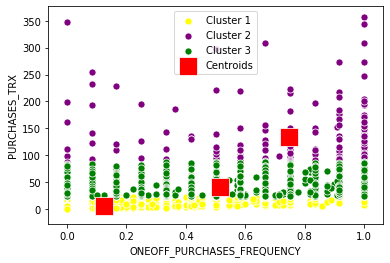

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'CREDIT_LIMIT')

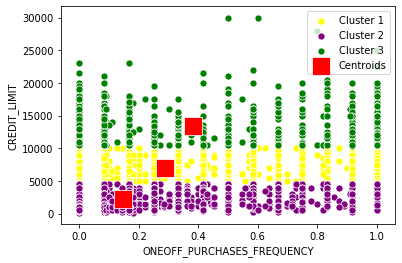

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'PAYMENTS')

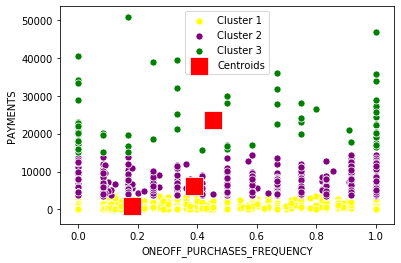

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

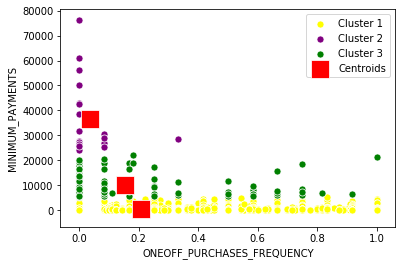

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

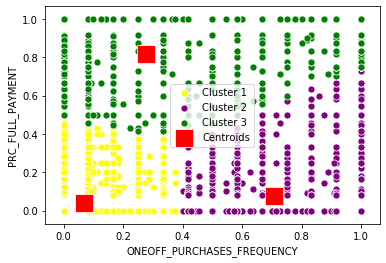

Text(0.5, 0, 'ONEOFF_PURCHASES_FREQUENCY')

Text(0, 0.5, 'TENURE')

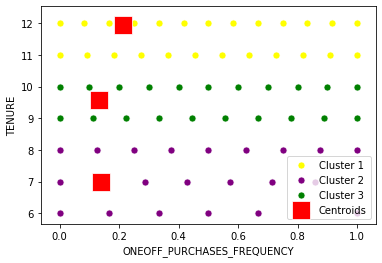

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_FREQUENCY')

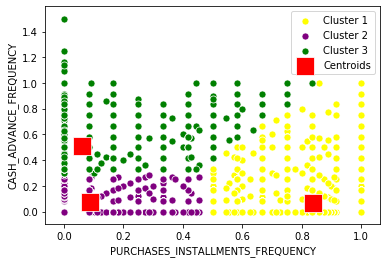

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

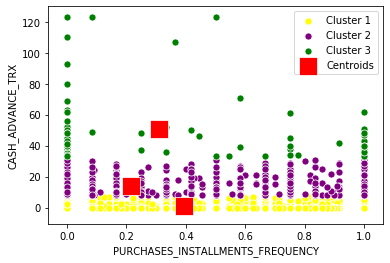

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'PURCHASES_TRX')

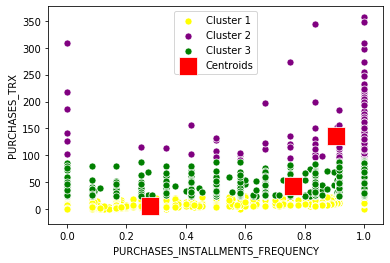

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'CREDIT_LIMIT')

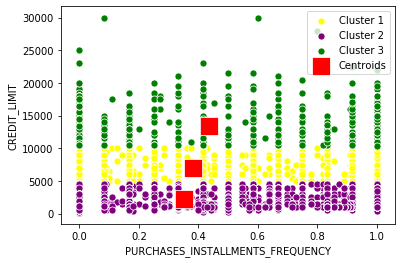

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'PAYMENTS')

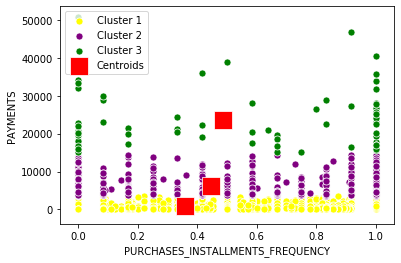

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

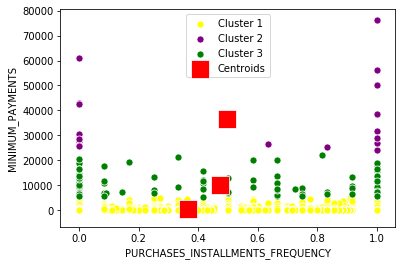

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

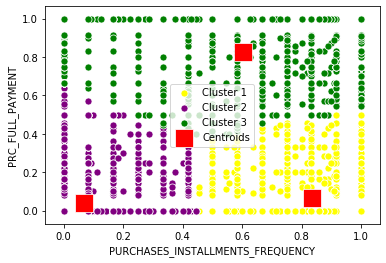

Text(0.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY')

Text(0, 0.5, 'TENURE')

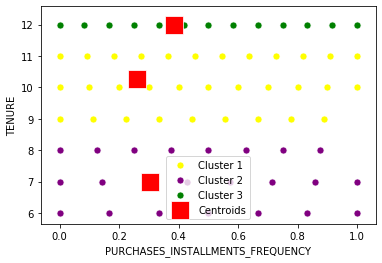

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'CASH_ADVANCE_TRX')

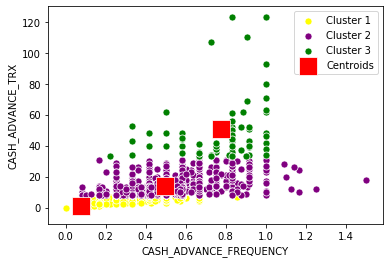

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'PURCHASES_TRX')

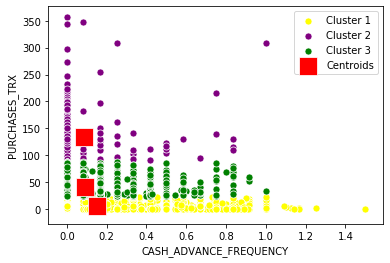

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'CREDIT_LIMIT')

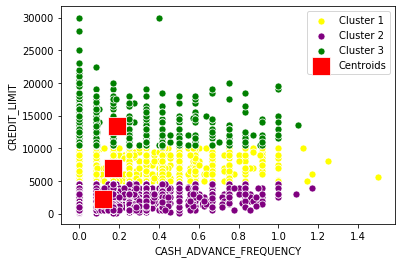

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'PAYMENTS')

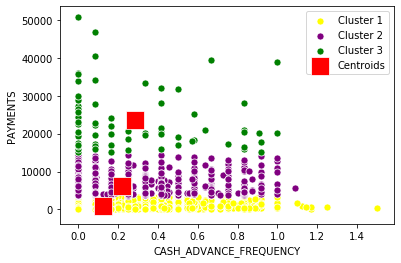

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

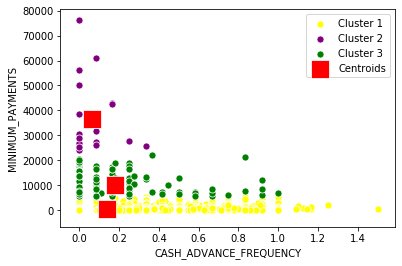

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

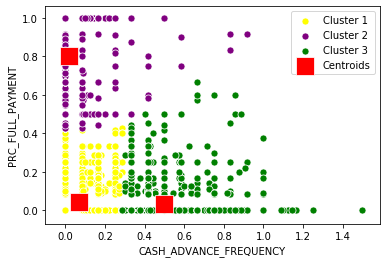

Text(0.5, 0, 'CASH_ADVANCE_FREQUENCY')

Text(0, 0.5, 'TENURE')

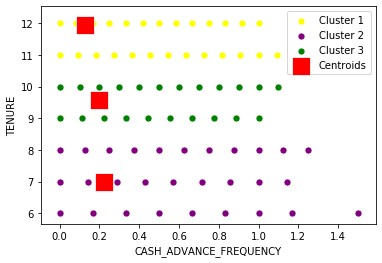

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'PURCHASES_TRX')

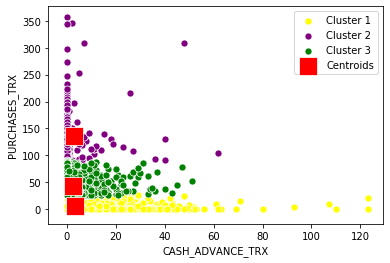

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'CREDIT_LIMIT')

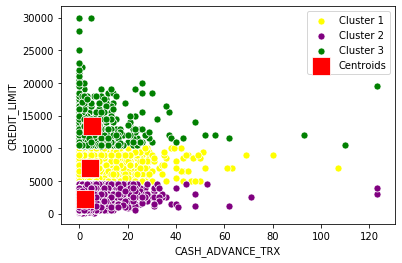

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'PAYMENTS')

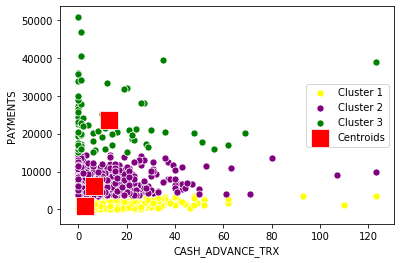

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

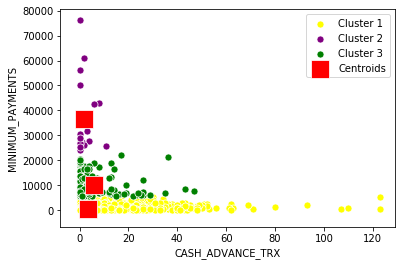

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

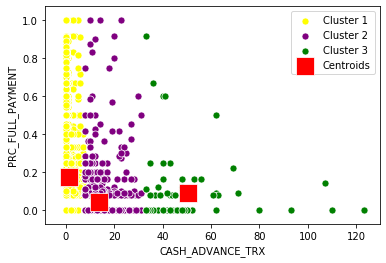

Text(0.5, 0, 'CASH_ADVANCE_TRX')

Text(0, 0.5, 'TENURE')

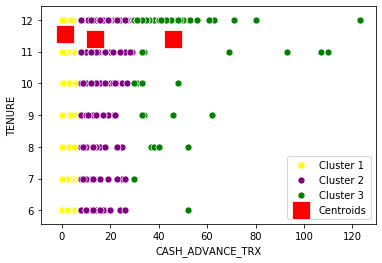

Text(0.5, 0, 'PURCHASES_TRX')

Text(0, 0.5, 'CREDIT_LIMIT')

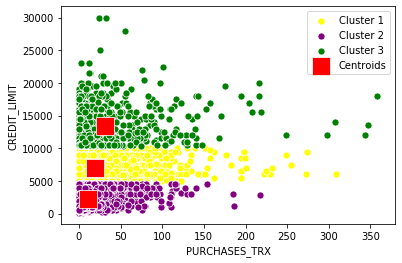

Text(0.5, 0, 'PURCHASES_TRX')

Text(0, 0.5, 'PAYMENTS')

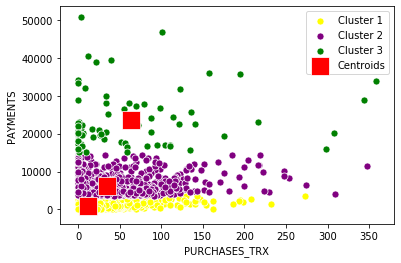

Text(0.5, 0, 'PURCHASES_TRX')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

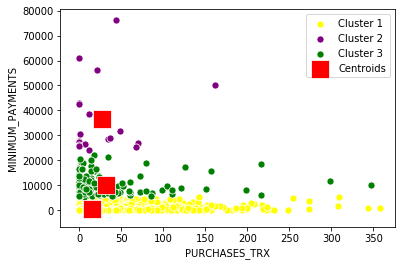

Text(0.5, 0, 'PURCHASES_TRX')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

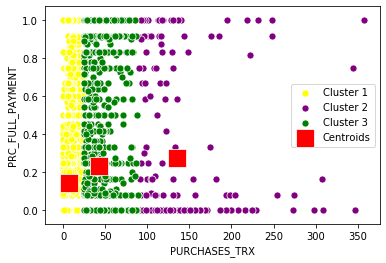

Text(0.5, 0, 'PURCHASES_TRX')

Text(0, 0.5, 'TENURE')

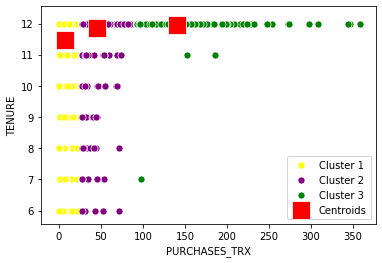

Text(0.5, 0, 'CREDIT_LIMIT')

Text(0, 0.5, 'PAYMENTS')

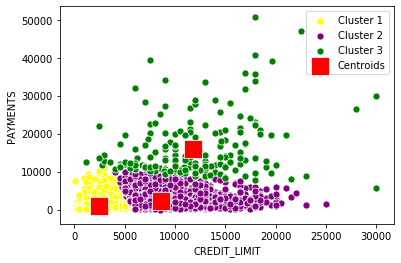

Text(0.5, 0, 'CREDIT_LIMIT')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

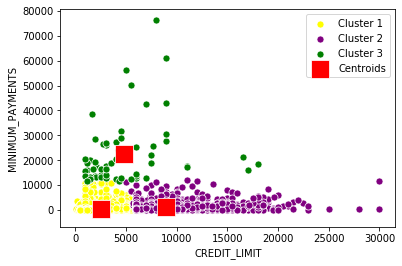

Text(0.5, 0, 'CREDIT_LIMIT')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

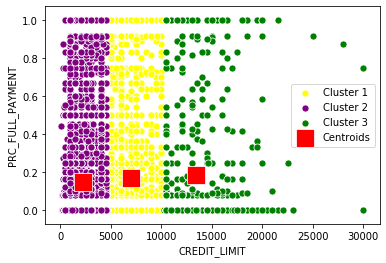

Text(0.5, 0, 'CREDIT_LIMIT')

Text(0, 0.5, 'TENURE')

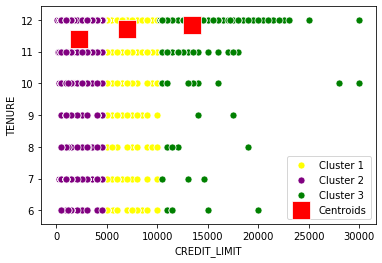

Text(0.5, 0, 'PAYMENTS')

Text(0, 0.5, 'MINIMUM_PAYMENTS')

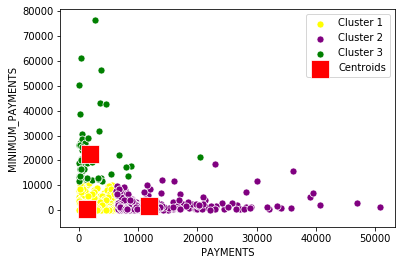

Text(0.5, 0, 'PAYMENTS')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

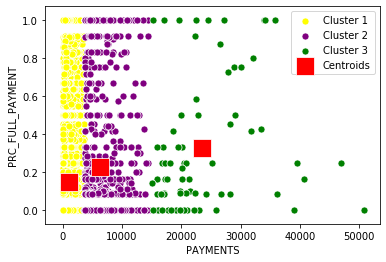

Text(0.5, 0, 'PAYMENTS')

Text(0, 0.5, 'TENURE')

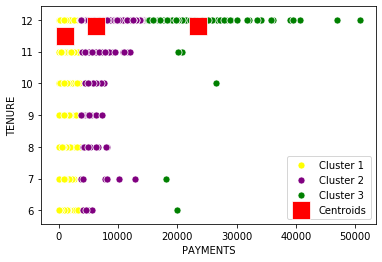

Text(0.5, 0, 'MINIMUM_PAYMENTS')

Text(0, 0.5, 'PRC_FULL_PAYMENT')

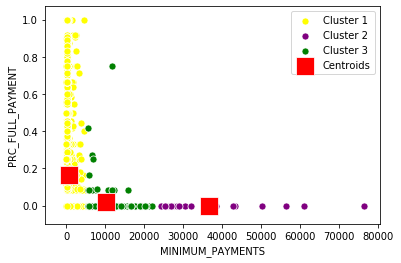

Text(0.5, 0, 'MINIMUM_PAYMENTS')

Text(0, 0.5, 'TENURE')

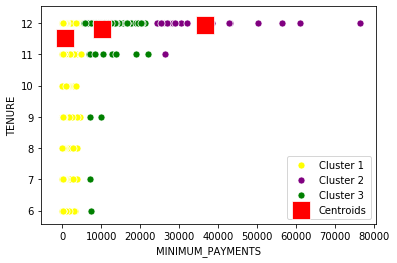

Text(0.5, 0, 'PRC_FULL_PAYMENT')

Text(0, 0.5, 'TENURE')

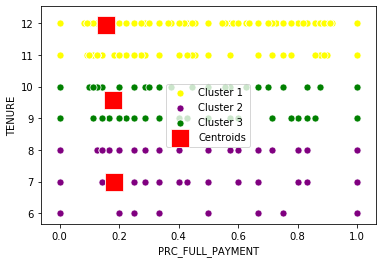

In [8]:
cols = df.columns
lst_combi = list(combinations(cols, 2))
for feat in lst_combi:
    lst_feat = df[list(feat)]
        
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(lst_feat)
    sns.scatterplot(lst_feat.values[y_kmeans == 0, 0], lst_feat.values[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
    sns.scatterplot(lst_feat.values[y_kmeans == 1, 0], lst_feat.values[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
    sns.scatterplot(lst_feat.values[y_kmeans == 2, 0], lst_feat.values[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                    label = 'Centroids',s=300,marker=',')

    plt.xlabel(lst_feat.columns[0])
    plt.ylabel(lst_feat.columns[1])
    plt.show()
    
#     wcss = []
#     kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
#     kmeans.fit(lst_feat)

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

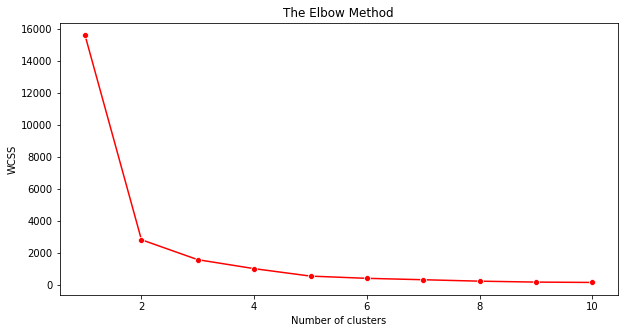

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(lst_feat)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [66]:
lst_feat

PRC_FULL_PAYMENT  TENURE
CUST_ID                          
C10001           0.000000      12
C10002           0.222222      12
C10003           0.000000      12
C10005           0.000000      12
C10006           0.000000      12
...                   ...     ...
C19184           0.000000       6
C19186           0.500000       6
C19188           0.250000       6
C19189           0.250000       6
C19190           0.000000       6

[8636 rows x 2 columns]

In [62]:
sns.scatterplot(lst_feat[y_kmeans == 0, 0], lst_feat[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(lst_feat[y_kmeans == 1, 0], lst_feat[y_kmeans == 1, 1], color = 'purple', label = 'Cluster 2',s=50)
sns.scatterplot(lst_feat[y_kmeans == 2, 0], lst_feat[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.show()

TypeError: '(array([ True,  True,  True, ..., False, False, False]), 0)' is an invalid key